# Proyek Analisis Data: Nama dataset
- Nama: Fauzan Fadhillah Arisandi
- Email: FauzanArisandiWoodWard90@gmail.com
- Id Dicoding: fauzanfa21

## Menentukan Pertanyaan Bisnis

- Di saat musim apa dimana sepeda banyak disewa ?
- Di saat cuaca apa dimana sepeda banyak disewa ?
- Pada tahun 2011 , kapan tepatnya jumlah rental sepeda terbanyak ?

## Menyiapkan semua library yang dibutuhkan

Pertama-tama kita melakukan import library supaya dapat mengambil data dan menganalisis data

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

Selanjutnya kita ambil data yang berk-ekstensi csv

In [161]:
df1 = pd.read_csv("Bike-sharing-dataset/day.csv")
df2 = pd.read_csv("Bike-sharing-dataset/hour.csv")

### Assessing Data

Selanjutnya kita lakukan fungsi info() untuk melihat nama kolom , total baris , dan data tipe pada dataset

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Sekarang kita periksa apakah ada nilai null pada dataset day.csv dan hour.csv

In [163]:
df1.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat kita lihat pada day.csv itu tidak terdapat nilai null

In [164]:
df2.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dapat kita lihat juga pada hour.csv itu tidak terdapat nilai null

Selanjutnya kita perlu mengetahui apakah ada nilai yang duplikat pada dataset

In [165]:
df1.duplicated().sum()

0

Pada dataset day.csv tidak terdapat nilai duplikat

In [166]:
df2.duplicated().sum()

0

Pada dataset hour.csv juga tidak terdapat nilai duplikat

### Cleaning Data

Setelah dilakukan pengecekan diatas pada :
- Nilai null
- Nilai duplikat

itu ditemukan bahwa dataset tidak mengandung Nilai Null dan Nilai Duplikat.
Maka tidak perlu dilakukan metode:
- dropna()
- drop_duplicates()

Selanjutnya kita periksa apakah ada outlier pada dataset

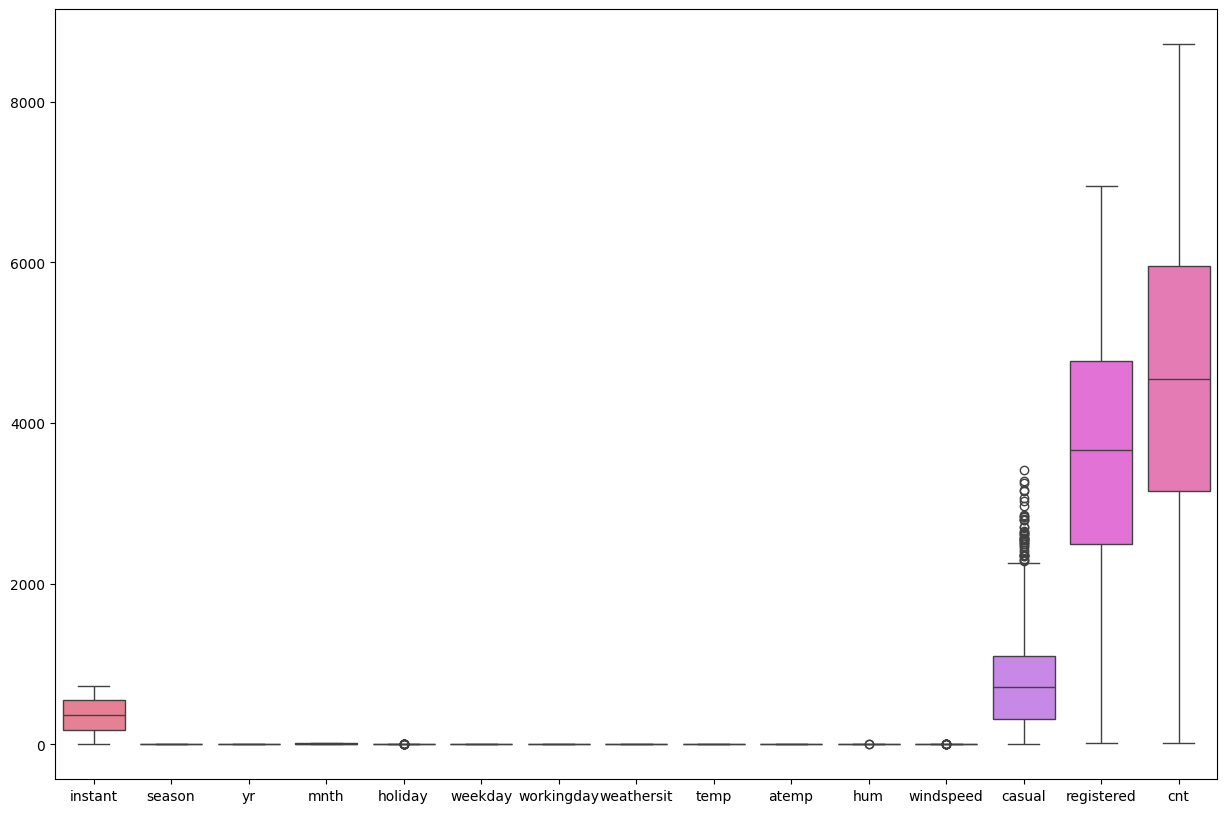

In [167]:
sns.boxplot(df1)
fig=plt.gcf()
fig.set_size_inches(15,10)

Pada di saat melakuan analisis pada data yakni menggunakan boxplot. Ditemukan bahwa kolom casual memiliki outlier yang cukup banyak. Maka kita perlu lakukan Drop pada Outlier tersebut.

In [168]:
Q1 = (df1['casual']).quantile(0.25)
Q3 = (df1['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df1['casual'] < minimum
kondisi_more_than = df1['casual'] > maximum

df1.drop(df1[kondisi_lower_than].index, inplace=True)
df1.drop(df1[kondisi_more_than].index, inplace=True)

Maka Hasil nya akan seperti di bawah ini :

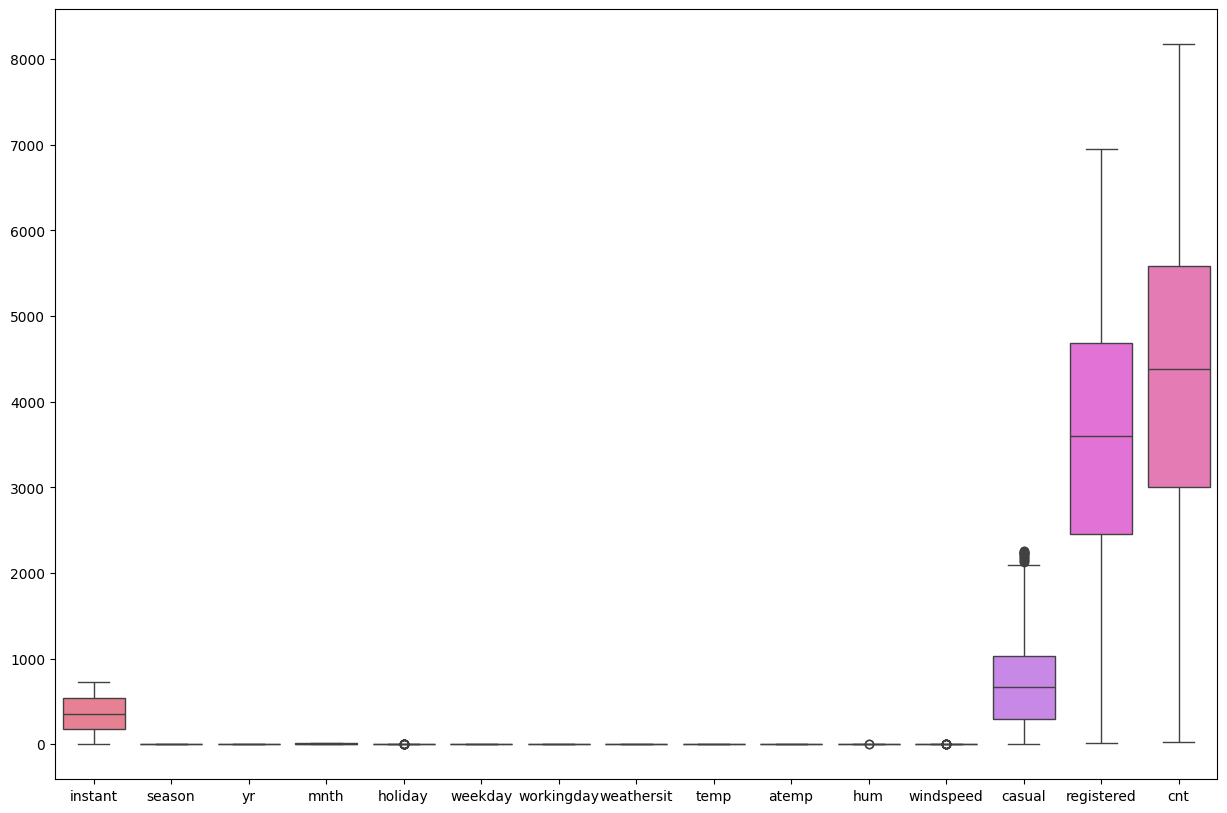

In [169]:
sns.boxplot(df1)
fig=plt.gcf()
fig.set_size_inches(15,10)

## Exploratory Data Analysis (EDA)

### Explore ...

Kita periksa berapa banyak nilai korelasi antar variabel.

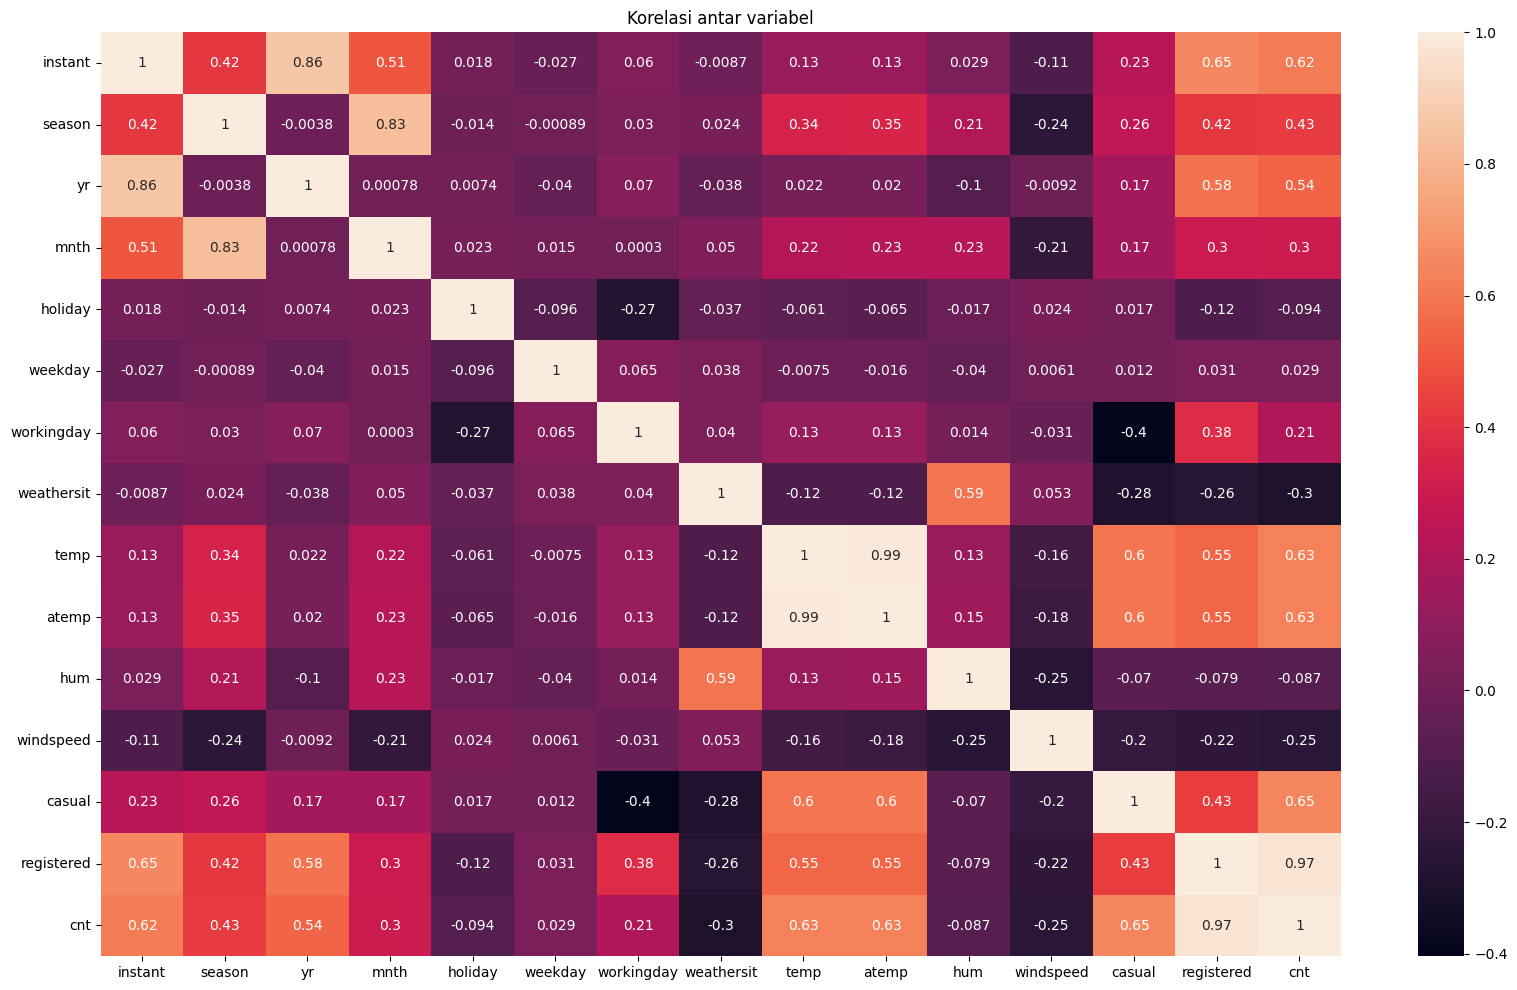

In [170]:
df4 = df1.drop(columns="dteday")
plt.figure(figsize=(20, 12))
sns.heatmap(df4.corr(), annot = True)
plt.title("Korelasi antar variabel")
plt.show()

Selanjutnya kita rubah nilai numerik pada dataset menggunakan Map() , untuk mempermudah memahami plot pada analisis kita.

In [171]:
df1['season']=df1.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
df1['mnth']=df1.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df1['weathersit']=df1.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow'})
df1['weekday']=df1.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Sekarang kita gunakan boxplot untuk memahami data

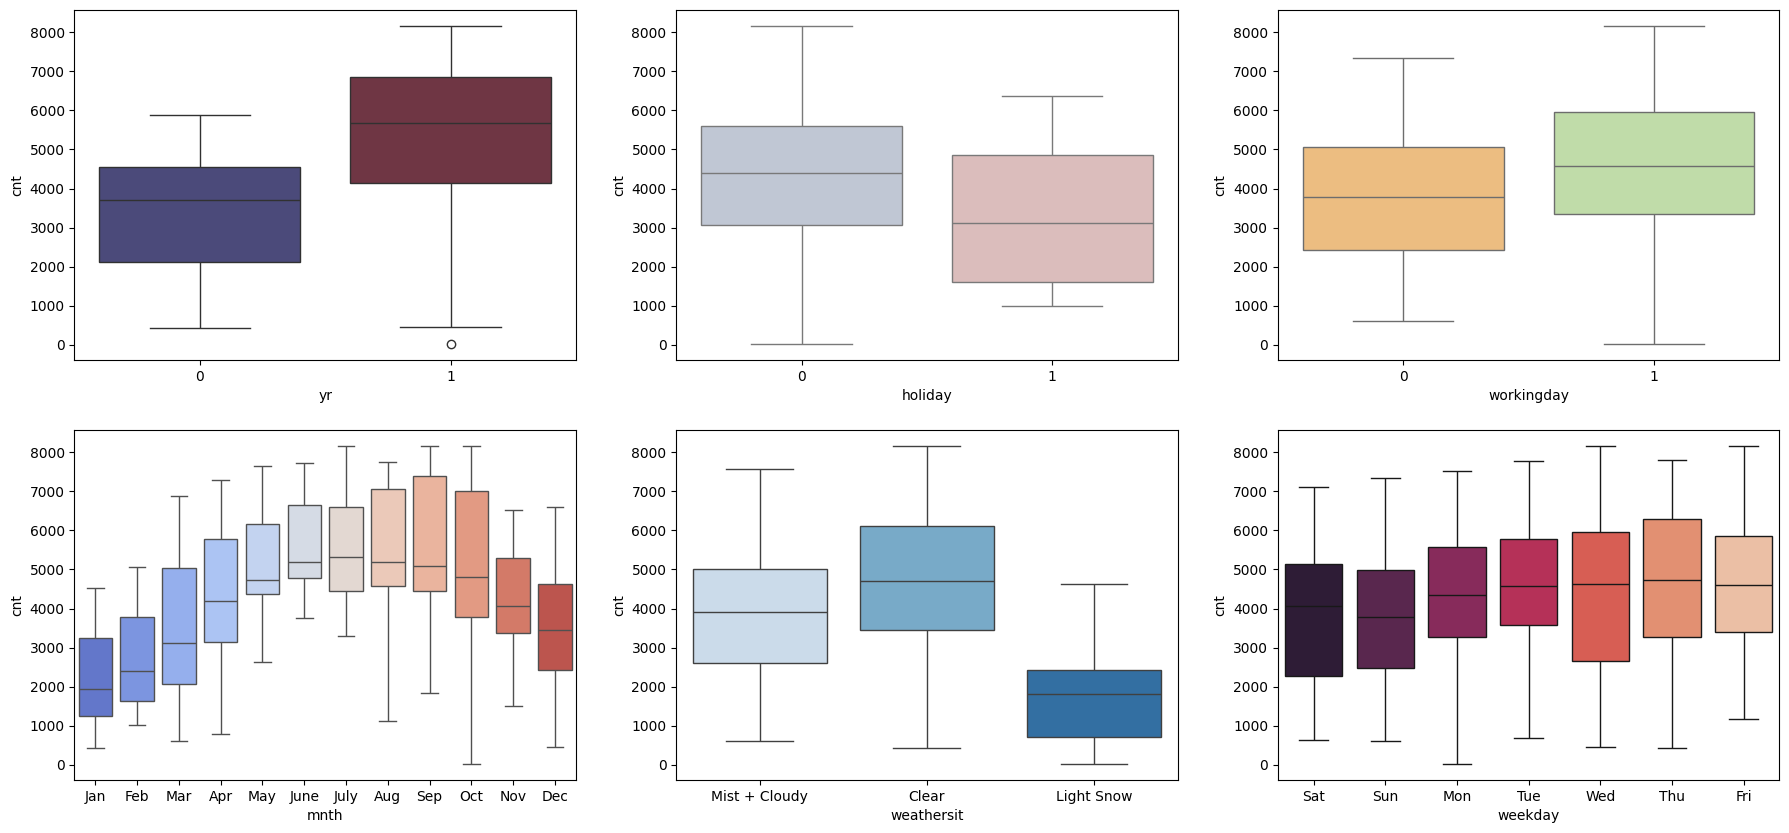

In [172]:
# scatter plot for categorical vars
plt.figure(figsize=(22, 10))

plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df1,palette="icefire")

plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1,palette="vlag")

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1,palette="Spectral")

plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1,palette="coolwarm")

plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1,palette="Blues")

plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1,palette="rocket")

plt.show()

Plot yang di bawah ini menunjukan jumlah total sepeda disewa pada jam tertentu yakni jam 00:00 hingga 23:00


Langkah membuatnya:
<h6>1.SUM jumlah count pada hour tertentu<h6>
<h6>2.Buat variabel baru , lalu masukan sum nya pada variable tersebut<h6>
<h6>3.Membuat dataframe dengan kolom hour dan count yang di isi dari variable sum sebelumnya<h6>
<h6>4.Lalu buatlah barplot dengan dataframe itu.<h6>

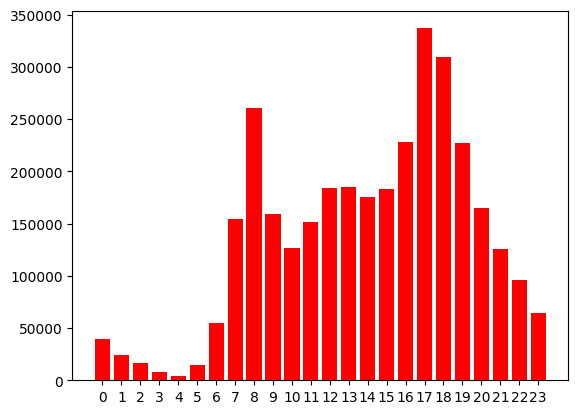

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [173]:
hr0=df2.loc[df2['hr'] == 0, 'cnt'].sum()
hr1=df2.loc[df2['hr'] == 1, 'cnt'].sum()
hr2=df2.loc[df2['hr'] == 2, 'cnt'].sum()
hr3=df2.loc[df2['hr'] == 3, 'cnt'].sum()
hr4=df2.loc[df2['hr'] == 4, 'cnt'].sum()
hr5=df2.loc[df2['hr'] == 5, 'cnt'].sum()
hr6=df2.loc[df2['hr'] == 6, 'cnt'].sum()
hr7=df2.loc[df2['hr'] == 7, 'cnt'].sum()
hr8=df2.loc[df2['hr'] == 8, 'cnt'].sum()
hr9=df2.loc[df2['hr'] == 9, 'cnt'].sum()
hr10=df2.loc[df2['hr'] == 10, 'cnt'].sum()
hr11=df2.loc[df2['hr'] == 11, 'cnt'].sum()
hr12=df2.loc[df2['hr'] == 12, 'cnt'].sum()
hr13=df2.loc[df2['hr'] == 13, 'cnt'].sum()
hr14=df2.loc[df2['hr'] == 14, 'cnt'].sum()
hr15=df2.loc[df2['hr'] == 15, 'cnt'].sum()
hr16=df2.loc[df2['hr'] == 16, 'cnt'].sum()
hr17=df2.loc[df2['hr'] == 17, 'cnt'].sum()
hr18=df2.loc[df2['hr'] == 18, 'cnt'].sum()
hr19=df2.loc[df2['hr'] == 19, 'cnt'].sum()
hr20=df2.loc[df2['hr'] == 20, 'cnt'].sum()
hr21=df2.loc[df2['hr'] == 21, 'cnt'].sum()
hr22=df2.loc[df2['hr'] == 22, 'cnt'].sum()
hr23=df2.loc[df2['hr'] == 23, 'cnt'].sum()

datahr = {
  "hr": ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
  "cnt": [hr0,hr1,hr2,hr3,hr4,hr5,hr6,hr7,hr8,hr9,hr10,hr11,hr12,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22,hr23]
}

#load data into a DataFrame object:
df10 = pd.DataFrame(datahr)
plt.bar(x='hr',height='cnt',data=df10,color='red')
plt.show()
print(df10)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di saat musim apa dimana sepeda banyak disewa ?

Untuk memulai membuat plot nya , kita perlu membuat dataframe baru yang mana berisi season dan count , yang nanti akan kita gunakan untuk membuat plot nya.


Langkah membuatnya:
<h6>1.SUM jumlah count pada season tertentu<h6>
<h6>2.Buat variabel baru , lalu masukan sum nya pada variable tersebut<h6>
<h6>3.Membuat dataframe dengan kolom season dan count yang di isi dari variable sum sebelumnya<h6>
<h6>4.Lalu buatlah barplot dengan dataframe itu.<h6>

In [174]:
su=df1.loc[df1['season'] == 'summer', 'cnt'].sum()
sp=df1.loc[df1['season'] == 'spring', 'cnt'].sum()
fa=df1.loc[df1['season'] == 'fall', 'cnt'].sum()
wi=df1.loc[df1['season'] == 'winter', 'cnt'].sum()

data = {
  "season": ['summer', 'spring', 'fall', 'winter'],
  "cnt": [su, sp, fa,wi]
}

#load data into a DataFrame object:
df0 = pd.DataFrame(data)


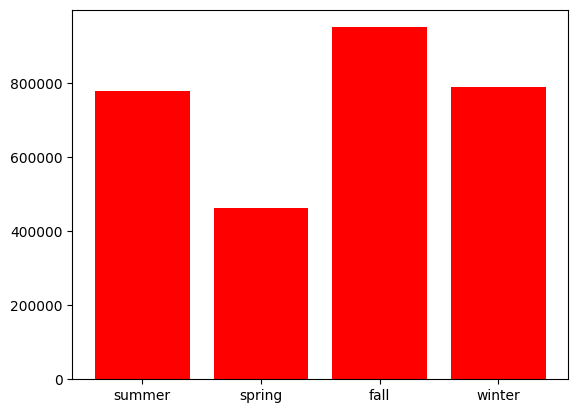

   season     cnt
0  summer  778246
1  spring  463512
2    fall  951468
3  winter  788881


In [175]:
plt.bar(x='season',height='cnt',data=df0,color='red')
plt.show()
print(df0)

### Pertanyaan 2: Di saat cuaca apa dimana sepeda banyak disewa ?

In [176]:
cl=df1.loc[df1['weathersit'] == 'Clear', 'cnt'].sum()
mi=df1.loc[df1['weathersit'] == 'Mist + Cloudy', 'cnt'].sum()
li=df1.loc[df1['weathersit'] == 'Light Snow', 'cnt'].sum()

data = {
  "weathersit": ['Clear', 'Mist + Cloudy', 'Light Snow'],
  "cnt": [cl,mi,li]
}

#load data into a DataFrame object:
df9 = pd.DataFrame(data)


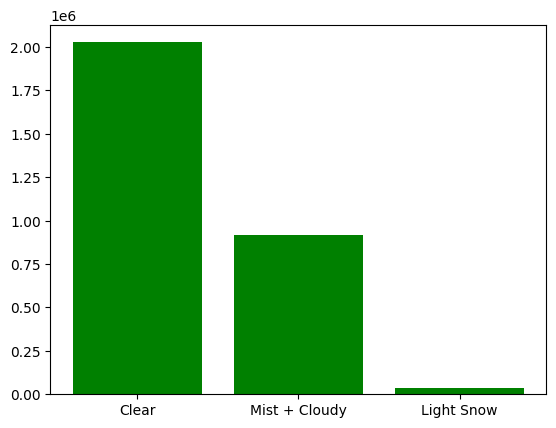

      weathersit      cnt
0          Clear  2027610
1  Mist + Cloudy   916628
2     Light Snow    37869


In [177]:
plt.bar(x='weathersit',height='cnt',data=df9,color='green')
plt.show()
print(df9)

### Pertanyaan 3: Pada tahun 2011 , kapan tepatnya jumlah rental sepeda terbanyak ?

In [178]:

df1['dteday'] = pd.to_datetime(df1['dteday'])

def extract_feature(df):
    df["year"] = df['dteday'].dt.year
    df["day"] = df['dteday'].dt.day
    df["month"] = df['dteday'].dt.month
    df["hour"] = df['dteday'].dt.hour
    df['dayofweek'] = df['dteday'].dt.dayofweek


extract_feature(df1)



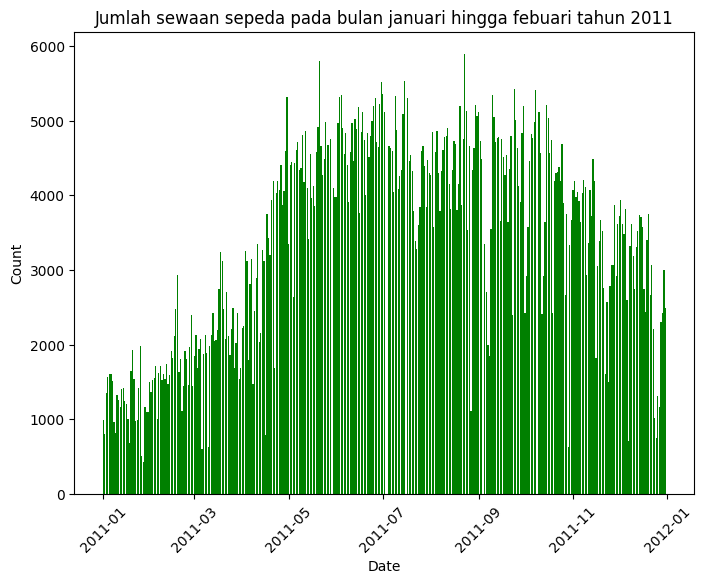

Pada Tanggal 234   2011-08-23
Name: dteday, dtype: datetime64[ns] Dengan jumlah rental sepeda ->  5895


In [179]:
#Ini untuk membuat plot hanya untuk tahun 2011 saja. Dengan menggunakan kolom dteday dan count.
filtered_df = df1[(df1['dteday'] >= '2011-01-01') & (df1['dteday'] <= '2011-12-31')]
daily_counts = filtered_df.groupby(filtered_df['dteday'].dt.date)['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values
plt.figure(figsize=(8,6))
plt.bar(dates, counts, color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Jumlah sewaan sepeda pada bulan januari hingga febuari tahun 2011')
plt.xticks(rotation=45)
plt.show()

#Di bawah ini untuk menemukan tanggal tepat nya dimana sepeda banyak di rental
rslt_df = df1.loc[df1['cnt'] == counts.max()]
print("Pada Tanggal" ,rslt_df["dteday"],"Dengan jumlah rental sepeda -> " ,counts.max())


## Conclusion

- Conclusion pertanyaan 1
Dari hasil analisis yang di dapat , di temukan bahwa pada musim fall(gugur) adalah musim dimana sepeda banyak di rental yakni dengan jumlah 951.468 kali.

- Conclusion pertanyaan 2
Dari hasil analisis yang di dapat , di temukan bahwa pada cuaca Clear(cerah) adalah cuaca dimana sepeda banyak di rental yakni dengan jumlah 2.027.610 kali.

- Conclusion pertanyaan 3
Dari hasil analisis yang di dapat , di temukan bahwa pada tanggal 23 Agustus 2011 adalah waktu dimana sepeda banyak di rental yakni dengan jumlah 5895 kali.

## Analisis Lanjutan : Clustering dengan Metode Binning

Kita akan melakukan clustering dengan menggunakan Binning, pada Kolom:
- Temp (Suhu yang telah dinormalisasi dalam satuan celcius)
- Humidity (Kelembapan udara yang telah dinormalisasi)
- Windspeed (Kecepatan angin yang telah dinormalisasi)

Tujuan dari analisis lanjutan ini adalah untuk mengetahui apakah suhu , kelembapan udara serta kecepatan angin yang terjadi itu mempengaruhi bisnis perentalan sepeda.

### Temp


In [180]:
def temp_group(temp):
    if temp < 0.3:
        return 'Low Temperature'
    elif 0.3 <= temp < 0.6:
        return 'Medium Temperature'
    else:
        return 'High Temperature'

df1['temp_group'] = df1['temp'].apply(temp_group)

bins = [df1['cnt'].min(), 2000, 4000, df1['cnt'].max()]
labels = ['Low Rentals', 'Moderate Rentals', 'High Rentals']
df1['cnt_group'] = pd.cut(df1['cnt'], bins=bins, labels=labels, include_lowest=True)


print(df1[['temp', 'temp_group', 'cnt', 'cnt_group']].head())

       temp          temp_group   cnt    cnt_group
0  0.344167  Medium Temperature   985  Low Rentals
1  0.363478  Medium Temperature   801  Low Rentals
2  0.196364     Low Temperature  1349  Low Rentals
3  0.200000     Low Temperature  1562  Low Rentals
4  0.226957     Low Temperature  1600  Low Rentals


temp_group: Dibuat dari kolom temp dengan fungsi temp_group, mengategorikan suhu menjadi 'Low Temperature', 'Medium Temperature', dan 'High Temperature'.

Keterangan:

- Jika temp kurang dari 0.3, diberi label 'Low Temperature'.

- Jika temp berada antara 0.3 (inklusif) dan 0.6 (eksklusif), diberi label 'Medium Temperature'.

- Jika temp lebih dari atau sama dengan 0.6, diberi label 'High Temperature'.


cnt_group: Dibuat dari kolom cnt menggunakan pd.cut, mengelompokkan jumlah rental menjadi 'Low Rentals', 'Moderate Rentals', dan 'High Rentals'.

Keterangan:

- Low Rentals adalah nilai minimum dari kolom cnt
- Moderate Rentals adalah nilai tengah (2000,4000)
- High rentals adalah nilai maksimum dari kolom cnt


Setelah dilakukan Binning group , selanjutnya di visualisasikan dengan barplot

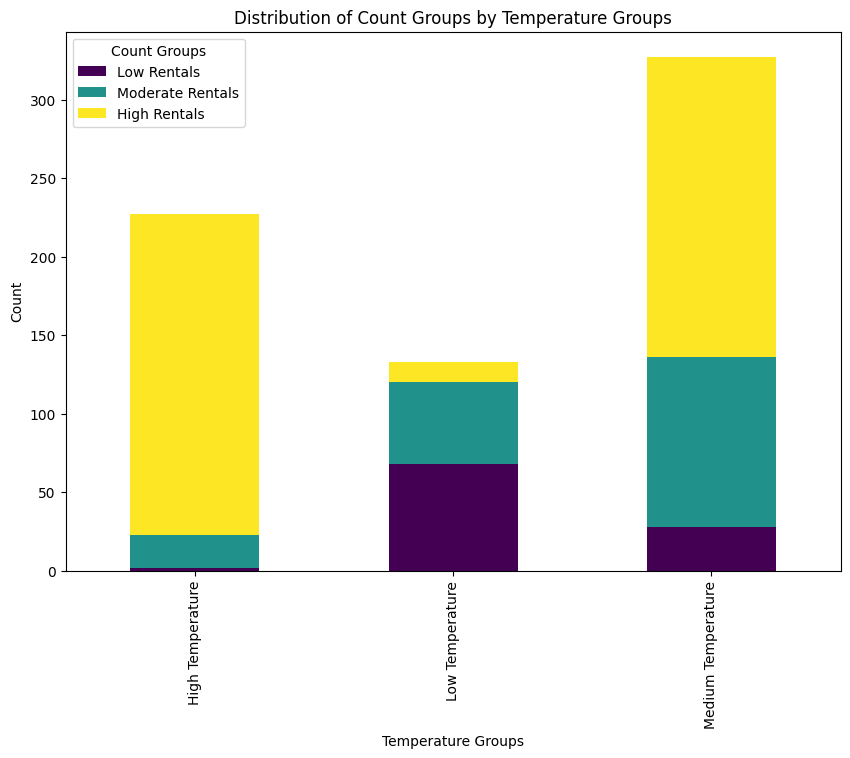

In [181]:
grouped = df1.groupby(['temp_group', 'cnt_group']).size().unstack()


grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Distribution of Count Groups by Temperature Groups')
plt.xlabel('Temperature Groups')
plt.ylabel('Count')
plt.legend(title='Count Groups')
plt.show()


Dari grafik ini dapat disimpulkan bahwa:

- Dalam suhu yang medium , frekuensi rental sepeda tiap hari yang mencapai 4000x rental itu cukup tinggi dan jumlah overall lebih tinggi daripada disaat suhu rendah dan suhu tinggi.
- Dalam suhu yang rendah , frekuensi rental sepeda tiap hari yang mencapai 2000x rental itu paling tinggi daripada suhu medium dan suhu tinggi, tapi jumlah overall rental paling rendah.
- Dalam suhu yang tinggi , frekuensi rental sepeda tiap hari yang mencapai 4000x rental itu paling tinggi daripada suhu rendah dan suhu medium , tapi jumlah overall cukup banyak (medium) dibandingkan dengan suhu rendah dan suhu medium.

### Humidity

In [182]:
def hum_group(hum):
    if hum < 0.5:
        return 'Low Humidity'
    elif 0.5 <= hum < 0.7:
        return 'Medium Humidity'
    else:
        return 'High Humidity'

df1['hum_group'] = df1['hum'].apply(hum_group)

bins = [df1['cnt'].min(), 2000, 4000, df1['cnt'].max()]
labels = ['Low Rentals', 'Moderate Rentals', 'High Rentals']
df1['cnt_group'] = pd.cut(df1['cnt'], bins=bins, labels=labels, include_lowest=True)

print(df1[['hum', 'hum_group', 'cnt', 'cnt_group']].head())



        hum        hum_group   cnt    cnt_group
0  0.805833    High Humidity   985  Low Rentals
1  0.696087  Medium Humidity   801  Low Rentals
2  0.437273     Low Humidity  1349  Low Rentals
3  0.590435  Medium Humidity  1562  Low Rentals
4  0.436957     Low Humidity  1600  Low Rentals


humidity_group: Dibuat dari kolom humidity dengan fungsi humidity_group, mengategorikan suhu menjadi 'Low Humidity', 'Medium Humidity', dan 'High Humidity'.

Keterangan:

- Jika humidity kurang dari 0.5, diberi label 'Low Humidity'.

- Jika humidity berada antara 0.5 (inklusif) dan 0.7 (eksklusif), diberi label 'Medium Humidity'.

- Jika humidity lebih dari atau sama dengan 0.7, diberi label 'High Humidity'.



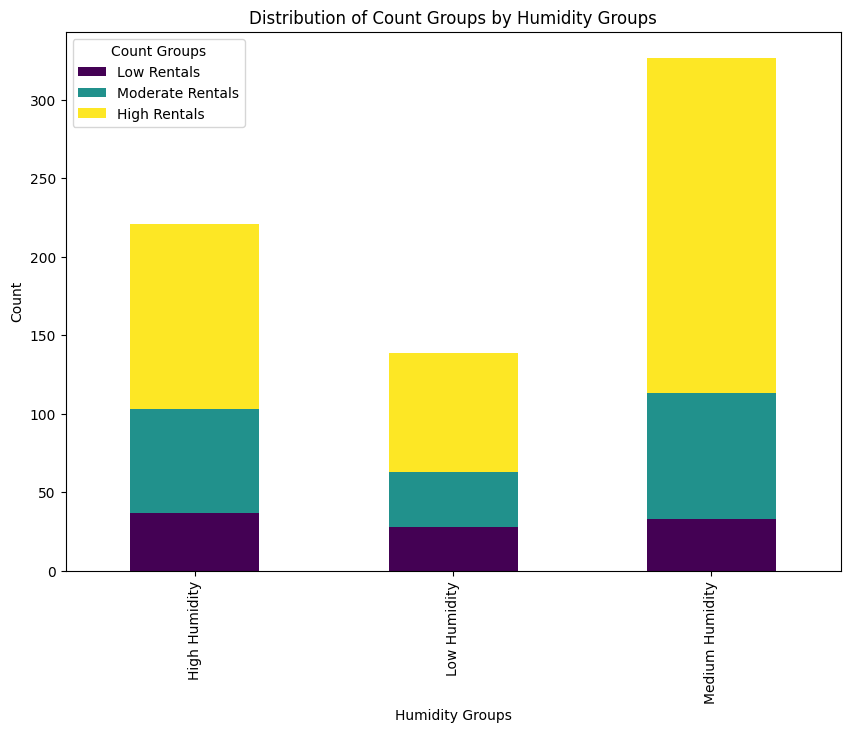

In [183]:
grouped = df1.groupby(['hum_group', 'cnt_group']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Distribution of Count Groups by Humidity Groups')
plt.xlabel('Humidity Groups')
plt.ylabel('Count')
plt.legend(title='Count Groups')
plt.show()




Dari grafik ini dapat disimpulkan bahwa:

- Dalam Humidity/Kelembapan Udara yang medium , frekuensi rental sepeda tiap hari yang mencapai 4000x rental itu paling tinggi dan jumlah overall lebih tinggi daripada disaat kelembapan udara rendah dan kelembapan udara tinggi.



### Windspeed


In [184]:
def windspeed_group(windspeed):
    if windspeed < 0.1:
        return 'Low Windspeed'
    elif 0.1 <= windspeed < 0.2:
        return 'Medium Windspeed'
    else:
        return 'High Windspeed'

df1['windspeed_group'] = df1['windspeed'].apply(windspeed_group)

bins = [df1['cnt'].min(), 2000, 4000, df1['cnt'].max()]
labels = ['Low Rentals', 'Moderate Rentals', 'High Rentals']
df1['cnt_group'] = pd.cut(df1['cnt'], bins=bins, labels=labels, include_lowest=True)

print(df1[['windspeed', 'windspeed_group', 'cnt', 'cnt_group']].head())



   windspeed   windspeed_group   cnt    cnt_group
0   0.160446  Medium Windspeed   985  Low Rentals
1   0.248539    High Windspeed   801  Low Rentals
2   0.248309    High Windspeed  1349  Low Rentals
3   0.160296  Medium Windspeed  1562  Low Rentals
4   0.186900  Medium Windspeed  1600  Low Rentals


windspeed_group: Dibuat dari kolom windspeed dengan fungsi windspeed_group, mengategorikan suhu menjadi 'Low Windspeed', 'Medium Windspeed', dan 'High Windspeed'.

Keterangan:

- Jika windspeed kurang dari 0.1, diberi label 'Low Windspeed'.

- Jika windspeed berada antara 0.1 (inklusif) dan 0.2 (eksklusif), diberi label 'Medium Windspeed'.

- Jika windspeed lebih dari atau sama dengan 0.2, diberi label 'High Windspeed'.




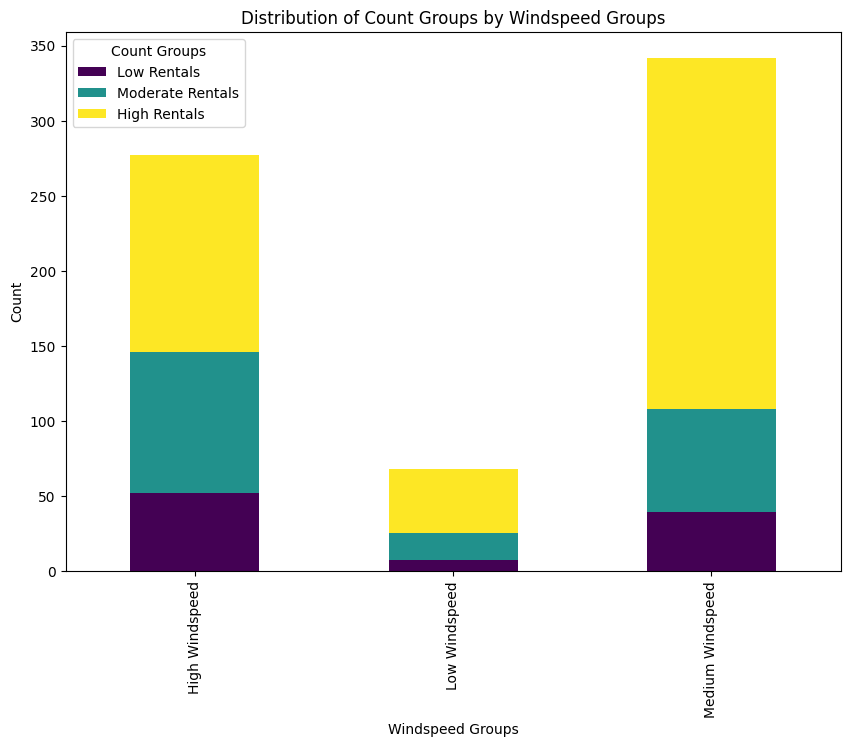

In [185]:
grouped = df1.groupby(['windspeed_group', 'cnt_group']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Distribution of Count Groups by Windspeed Groups')
plt.xlabel('Windspeed Groups')
plt.ylabel('Count')
plt.legend(title='Count Groups')
plt.show()




Dari grafik ini dapat disimpulkan bahwa:

- Dalam Windspeed/Kecepatan Angin yang medium , frekuensi rental sepeda tiap hari yang mencapai 4000x rental itu paling tinggi dan jumlah overall lebih tinggi daripada disaat kelembapan udara rendah dan kelembapan udara tinggi.

